<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 5</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
from scipy.special import legendre
from scipy.optimize import newton
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('/Users/annabellayang/Documents/Project/fall2023/PHYS129/P5')

<div style="text-align: center;">
    <h2><strong>Problem 1: Quadrature </strong></h2>
</div>
Let's looked at different quadrature methods and rules. 


<div style="text-align: center;">
    <h2><strong> Midpoint rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx (b - a) \cdot f\left(\frac{a + b}{2}\right)
$$

<div style="text-align: center;">
    <h2><strong> Trapezoidal Rule  </strong></h2>
</div>

$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

<div style="text-align: center;">
    <h2><strong> Simpson's Rule </strong></h2>
</div>
$$\int_{a}^{b} f(x) \, dx \approx \frac{b - a}{3} \left[ f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right]$$


## A) 
Define a class for all quadrature techniques.

In [2]:
class Quad_:
    def __init__(self,func,N,a,b):
        self.fuc = func
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N  # Grid spacing


    

## B) 
Write the above three quadrature rules as class methods **without any pre-defined function from any package** 1)  Midpoint rule 2) Trapezoidal Rule 3) Simpson's Rule. You need to figure out what additional inputs each rule needs. 

In [3]:
class Quad:
    def __init__(self, func, N, a, b):
        self.func = func
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N  # Grid spacing

    def midpoint_rule(self):
        # compute using midpoint rule
        total = 0
        for i in range(self.N):
            # find the midpoint
            midpoint = self.a + (i + 0.5) * self.h
            total += self.func(midpoint)
        return total * self.h

    def trapezoidal_rule(self):
        # compute using trapezoidal rule
        total = (self.func(self.a) + self.func(self.b)) / 2
        for i in range(1, self.N):
            total += self.func(self.a + i * self.h)
        return total * self.h

    def simpson_rule(self):
        # compute using simpson rule
        total = self.func(self.a) + self.func(self.b)
        for i in range(1, self.N, 2):
            total += 4 * self.func(self.a + i * self.h)
        for i in range(2, self.N - 1, 2):
            total += 2 * self.func(self.a + i * self.h)
        return total * self.h / 3

<div style="text-align: center;">
    <h3><strong> Gauss-Legendre Quadrature </strong></h3>
</div>

$$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$


## C)
Since the range is from a to b, let's make a variable change,
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$

Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
we make the variable transformation to chenge the integral's limit 
$$x_i \to \frac{b - a}{2} x_i + \frac{a + b}{2}$$ <br>
Then we can substitude $$x_i$$ into the integral $$\int_{-1}^{1} f(x) \, dx \approx \sum_{i=1}^{N} w_i \cdot f(x_i)$$, so it becomes <br>
$$\int_{a}^{b} f(x) \, dx = \int_{-1}^{1} f(\frac{b - a}{2} x_i + \frac{a + b}{2}) \, dx$$ <br>
and we then multiply the sum by the scaling factor to get the approximate solution over the new interval: <br>
$$\int_{a}^b f(x)dx \approx \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$ <br>
similar to the answer provided below
<br>
'' **write you answer above**''
<br> <br> 
You should get something like this: 
$$\int_{a}^b f(x)dx = \frac{b-a}{2} \sum_i w_i f(\frac{b - a}{2} x_i + \frac{a + b}{2})$$

<div style="text-align: center;">
    <h3><strong> Legendre polynomials </strong></h3>
</div>
To find the position and weights of an order M Gauss-Legendre Quadrature, we need to calculate the roots of an order-M Legendre polynomial,
$$(1 - x^2) \frac{d^2 P_M(x)}{dx^2} - 2x \frac{dP_M(x)}{dx} + M(M + 1)P_M(x) = 0,
$$
and the solutions are given by the following:  
$$P_M(x) = \frac{1}{2^n n!} \frac{d^M}{dx^M} \left[(x^2 - 1)^M\right]$$

## D)
Write a child class named Gauss_Quad_ inherits methods from its parent class Quad_. This class takes an additional input, called order. Define a new method that outputs an order-M Legendre polynomial. Plot the following Legendre polynomials: M=[1,2,3,4,5]. 

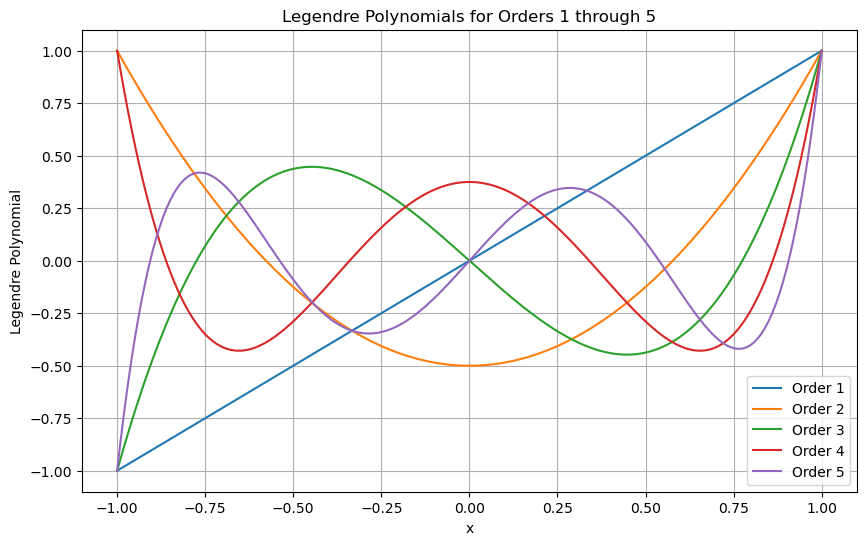

In [4]:
class Gauss_Quad_(Quad_):
    def __init__(self, fuc, N, a, b, order):
        # the parent class was defined above
        super().__init__(fuc, N, a, b)
        self.order = order

    def legendre_poly(self, x):
        # Use the scipy.special.legendre function which returns a Legendre function of the given order
        P = legendre(self.order)
        return P(x)

def plot_legendre_polynomials(orders, x_range):
    x_values = np.linspace(x_range[0], x_range[1], 200)
    plt.figure(figsize=(10, 6))

    for order in orders:
        gauss_quad = Gauss_Quad_(None, N=100, a=-1, b=1, order=order)
        y_values = gauss_quad.legendre_poly(x_values)
        plt.plot(x_values, y_values, label=f'Order {order}')

    plt.title('Legendre Polynomials for Orders 1 through 5')
    plt.xlabel('x')
    plt.ylabel('Legendre Polynomial')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_legendre_polynomials(orders=[1, 2, 3, 4, 5], x_range=[-1, 1])
       

<div style="text-align: center;">
    <h3><strong> Newton's Method </strong></h3>
</div>
The positions of an order M Gauss-Legendre Quadrature are calculated by finding roots of an order-M Legendre polynomial,
 <br>  <br> 
$$P_M(x)=0.$$
 <br> 
To numerically find those roots (M of them), we can use the Newton's method: 
 <br> 
$$x_{n+1} = x_{n} - \frac{P_M(x_{n})}{P_M'(x_{n})}.$$
You should be careful on the initial guess.
 <br> 
The weights $w_i$ for Gauss-Legendre Quadrature are calculated as:
$$w_i = \frac{2}{(1 - x_i^2) [P'_M(x_i)]^2}$$
where $P'_M(x_i)$ is the derivative of the Legendre polynomial of degree M evaluated at each root $x_i$. 

## E) 
 Calculate 'M' position and weights for Gaussian quadrature integration between 'a' and 'b' with the Newton's method. Returns a tuple of 2 arrays, the first array is the position of points and second array is the corresponding weights. Output an text file that contains the roots and weights for M=[1,2,3,4,5]. 

In [5]:
# Add the following to the class in part D). 
class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order
        
    def legendre_poly(self, x):
        P = legendre(self.order)
        return P(x)
    
    def newton_method_root(self):
        # Legendre polynomial of the specified order
        P = legendre(self.order)

        P_deriv = P.deriv()

        guess_roots = np.cos(np.pi * (np.arange(1, 2 * self.order, 2)) / (2 * self.order))
        roots = []
        weights = []

        for initial_guess in guess_roots:
            root = newton(P, initial_guess, P_deriv)
            roots.append(root)

            weight = 2 / ((1 - root**2) * (P_deriv(root)**2))
            weights.append(weight)
        
        root = np.array(roots)
        weights = np.array(weights)
        
        return root, weights

output_data = ""

for M in [1, 2, 3, 4, 5]:
    gauss_quad = Gauss_Quad_(func=None, N=100, a=-1, b=1, order=M)
    roots, weights = gauss_quad.newton_method_root()

    output_data += f"Order {M}:\n"
    output_data += "Roots: " + np.array_str(roots) + "\n"
    output_data += "Weights: " + np.array_str(weights) + "\n\n"

# Write the results to a text file
file_path = "gauss_legendre_roots_weights.txt"
with open(file_path, "w") as file:
    file.write(output_data)
print(output_data)

Order 1:
Roots: [0.]
Weights: [2.]

Order 2:
Roots: [ 0.57735027 -0.57735027]
Weights: [1. 1.]

Order 3:
Roots: [ 0.77459667  0.         -0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

Order 4:
Roots: [ 0.86113631  0.33998104 -0.33998104 -0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

Order 5:
Roots: [ 9.06179846e-01  5.38469310e-01 -1.23259516e-32 -5.38469310e-01
 -9.06179846e-01]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]




## F) 
Using the the following information,
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html
, calculate the roots and weights for M=[1,2,3,4,5]. Do they agree with what you calculate in E)?  

In [6]:
# Add the following to the class in part D). 
from scipy.special import roots_legendre 
legendre_roots_weights = {}   

class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order
        
    def legendre_poly(self, x):
        P = legendre(self.order)
        return P(x)
    
    def newton_method_root(self):
        # Legendre polynomial of the specified order
        P = legendre(self.order)

        P_deriv = P.deriv()

        guess_roots = np.cos(np.pi * (np.arange(1, 2 * self.order, 2)) / (2 * self.order))
        roots = []
        weights = []

        for initial_guess in guess_roots:
            root = newton(P, initial_guess, P_deriv)
            roots.append(root)

            weight = 2 / ((1 - root**2) * (P_deriv(root)**2))
            weights.append(weight)
        
        root = np.array(roots)
        weights = np.array(weights)
        
        return root, weights
    def scipy_method_root(self):
        # roots and weights using scipy's built-in method
        roots, weights = roots_legendre(self.order)
        return roots, weights
for M in [1, 2, 3, 4, 5]:
    gauss_quad = Gauss_Quad_(func=None, N=100, a=-1, b=1, order=M)
    roots, weights = gauss_quad.scipy_method_root()
    legendre_roots_weights[M] = (roots, weights)
    print(f'M={M}:\nRoots: {roots}\nWeights: {weights}\n')
#this matches with the answer found from the last part

M=1:
Roots: [0.]
Weights: [2.]

M=2:
Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]

M=3:
Roots: [-0.77459667  0.          0.77459667]
Weights: [0.55555556 0.88888889 0.55555556]

M=4:
Roots: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Weights: [0.34785485 0.65214515 0.65214515 0.34785485]

M=5:
Roots: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]



## G)
Based on the roots and weights, write a method that output the Gauss-Legendre Quadrature. 

In [7]:
# Add the following to the class in part D).
class Quad_:
    def __init__(self, func, N, a, b):
        self.func = func  # Ensure that func is properly initialized
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N
class Gauss_Quad_(Quad_):
    def __init__(self, func, N, a, b, order):
        super().__init__(func, N, a, b)
        self.order = order
        
    def legendre_poly(self, x):
        P = legendre(self.order)
        return P(x)
    
    def newton_method_root(self):
        # Legendre polynomial of the specified order
        P = legendre(self.order)

        P_deriv = P.deriv()

        guess_roots = np.cos(np.pi * (np.arange(1, 2 * self.order, 2)) / (2 * self.order))
        roots = []
        weights = []

        for initial_guess in guess_roots:
            root = newton(P, initial_guess, P_deriv)
            roots.append(root)

            weight = 2 / ((1 - root**2) * (P_deriv(root)**2))
            weights.append(weight)
        
        root = np.array(roots)
        weights = np.array(weights)
        return root, weights
    
    def scipy_method_root(self):
        # roots and weights using scipy's built-in method
        roots, weights = roots_legendre(self.order)
        return roots, weights
    
    def gauss_quad(self):
        # Get roots and weights for Gauss-Legendre Quadrature
        roots, weights = roots_legendre(self.order)
        # Transform the roots to the interval [a, b]
        transformed_roots = 0.5 * (self.b - self.a) * roots + 0.5 * (self.b + self.a)
        # Evaluate the function at the roots
        function_values = self.func(transformed_roots)
        # Calculate the integral
        integral = 0.5 * (self.b - self.a) * np.sum(weights * function_values)
        return integral

def my_function(x):
    return x**3

# Initialize the Gauss_Quad_ class with the function and parameters
gauss_quad_ = Gauss_Quad_(func=my_function, N=100, a=0, b=1, order=5)

# Calculate the integral result
integral_result = gauss_quad_.gauss_quad()
print(integral_result)

0.24999999999999994


<div style="text-align: center;">
    <h3><strong> Quadrature on test functions </strong></h3>
</div>

In the following question, we want to Use the above four methods, mid_quad, trapz_quad, simpson_quad, gauss_quad, to numerically calculate the quarature on two test functions ($k\geq 0)$

A general k-th order polynomial with a quadrature, 
$$I^{\rm T=A}_{\rm true}=\int_{a}^b dx x^k=\frac{1}{k+1}(b^{k+1}-a^{k+1})$$

A Fermi–Dirac distribution with a quadrature, 
$$I^{\rm T=B}_{\rm true}=\int_{a}^b dx \frac{1}{{1 + e^{-kx}}}=\frac{1}{k}(\log(e^{kb}+1)-\log(e^{ka}+1))$$


Let's define the following: for each order k and N, we have the quadrature value and the relative error,
1) mid_quad: $M(k,N)$,<br><br> $\Delta M(k,N)=2\frac{I_{\rm true}-M(k,N)}{I_{\rm true}+M(k,N)}$,
<br><br><br>
2) trapz_quad: $T(k,N)$,<br><br> $\Delta T(k,N)=2\frac{I_{\rm true}-T(k,N)}{I_{\rm true}+T(k,N)}$,
<br><br><br>
3) simpson_quad: $S(k,N)$,<br><br> $\Delta S(k,N)=2\frac{I_{\rm true}-S(k,N)}{I_{\rm true}+S(k,N)}$,
<br><br><br>
4) gauss_quad: $G(k,N)$,<br><br> $\Delta G(k,N)=2\frac{I_{\rm true}-G(k,N)}{I_{\rm true}+G(k,N)}$,

Let's make the following heatmap for each quadrature method above, 1-4), over the range $[0,1]$: 

y-axis: k from 0 to 10

x-axis: N from 10 to $10^5$

value: relative error




## H) Polynomial





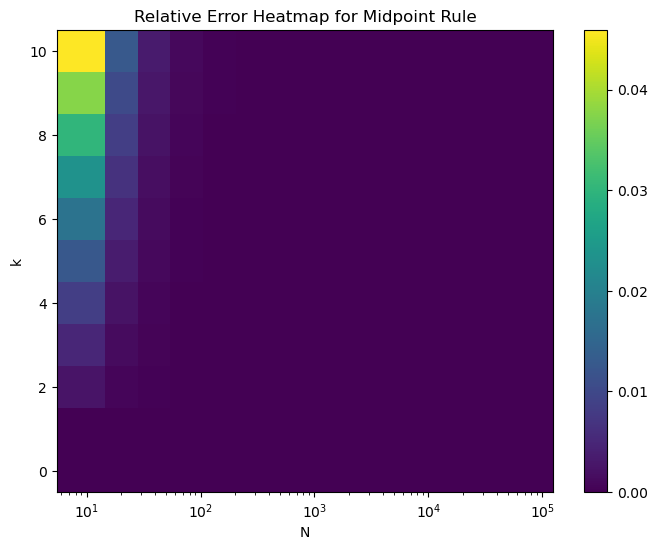

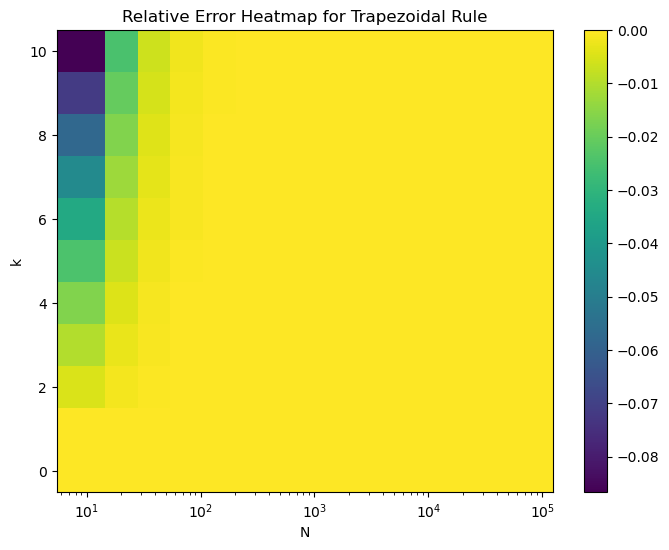

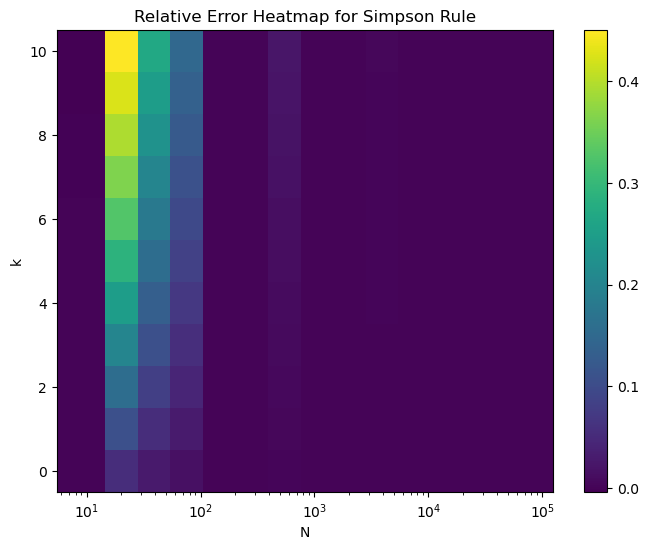

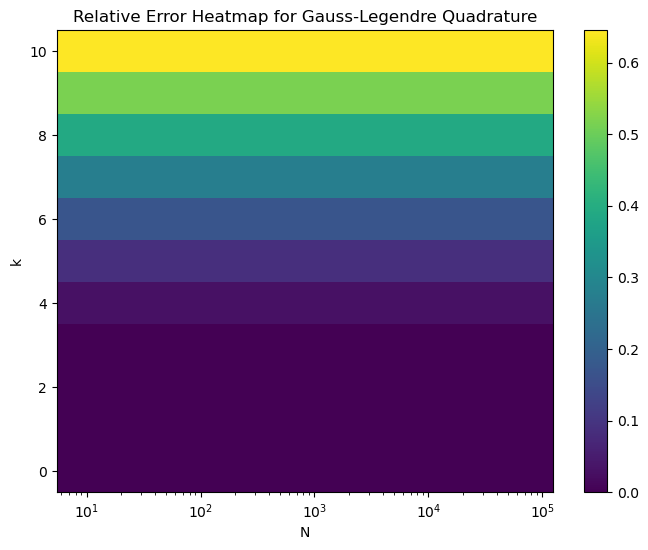

'--------------------Write your code above this line------------------------------'

In [8]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from scipy.special import roots_legendre

# Define the function for the k-th order polynomial integration
def poly_integral(k, x):
    return x**(k+1) / (k+1)

# Calculate the relative error
def relative_error(I_true, I_approx):
    return 2 * (I_true - I_approx) / (I_true + I_approx)

# Define the Quad_ class as provided
class Quad_:
    def __init__(self, k, N, a, b):
        self.k = k
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N

    def midpoint_rule(self):
        total = 0
        for i in range(self.N):
            midpoint = self.a + (i + 0.5) * self.h
            total += midpoint**self.k
        return total * self.h

    def trapezoidal_rule(self):
        total = (self.a**self.k + self.b**self.k) / 2.0
        for i in range(1, self.N):
            total += (self.a + i * self.h)**self.k
        return total * self.h

    def simpson_rule(self):
        total = self.a**self.k + self.b**self.k
        for i in range(1, self.N, 2):
            total += 4 * (self.a + i * self.h)**self.k
        for i in range(2, self.N - 1, 2):
            total += 2 * (self.a + i * self.h)**self.k
        return total * self.h / 3

# Define the range for k and N
ks = range(11)
Ns = np.geomspace(10, 10**5, num=15).astype(int)

# Prepare the results arrays
results_mid = np.zeros((len(ks), len(Ns)))
results_trap = np.zeros((len(ks), len(Ns)))
results_simp = np.zeros((len(ks), len(Ns)))
results_gauss = np.zeros((len(ks), len(Ns)))

# Calculate the quadratures and relative errors
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        quad = Quad_(k, N, 0, 1)
        I_true = poly_integral(k, 1) - poly_integral(k, 0)
        
        # Midpoint
        I_mid = quad.midpoint_rule()
        results_mid[i, j] = relative_error(I_true, I_mid)
        
        # Trapezoidal
        I_trap = quad.trapezoidal_rule()
        results_trap[i, j] = relative_error(I_true, I_trap)
        
        # Simpson
        I_simp = quad.simpson_rule()
        results_simp[i, j] = relative_error(I_true, I_simp)
        
        # Gauss-Legendre (assuming order 2 for demonstration purposes)
        roots, weights = roots_legendre(2)
        I_gauss = sum(weights * (0.5 * (1 + roots))**k) / 2  # rescaling the roots and weights
        results_gauss[i, j] = relative_error(I_true, I_gauss)

# Function to plot heatmaps
def plot_heatmap(data, method_name, ks, Ns):
    plt.figure(figsize=(8, 6))
    plt.title(f'Relative Error Heatmap for {method_name}')
    plt.xlabel('N')
    plt.ylabel('k')
    plt.xscale('log')
    plt.pcolormesh(Ns, ks, data, shading='nearest', cmap='viridis')
    plt.colorbar()
    plt.show()

# Generate meshgrids for plotting
Ns_grid, ks_grid = np.meshgrid(Ns, ks)

# Plot the heatmaps for each quadrature method
plot_heatmap(results_mid, 'Midpoint Rule', ks_grid, Ns_grid)
plot_heatmap(results_trap, 'Trapezoidal Rule', ks_grid, Ns_grid)
plot_heatmap(results_simp, 'Simpson Rule', ks_grid, Ns_grid)
plot_heatmap(results_gauss, 'Gauss-Legendre Quadrature', ks_grid, Ns_grid)



'''--------------------Write your code above this line------------------------------'''

## H) Fermi–Dirac


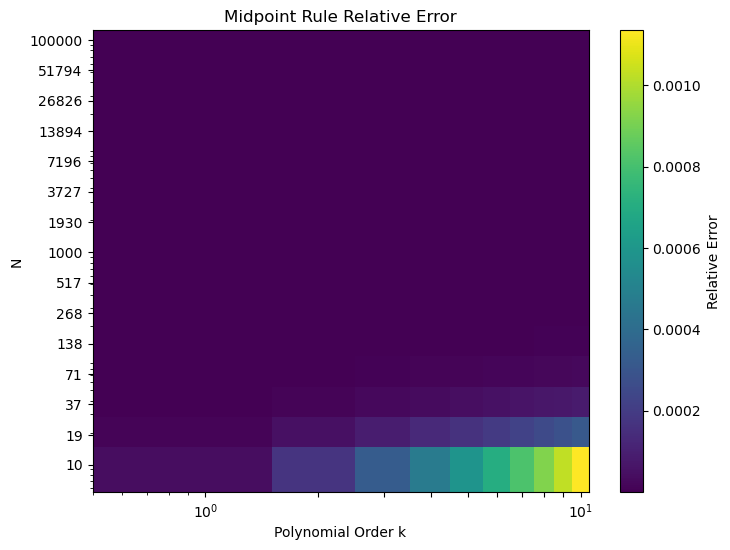

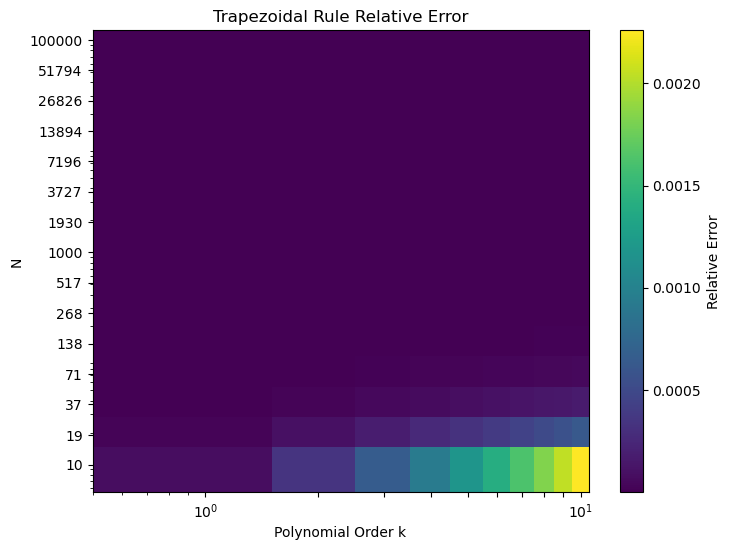

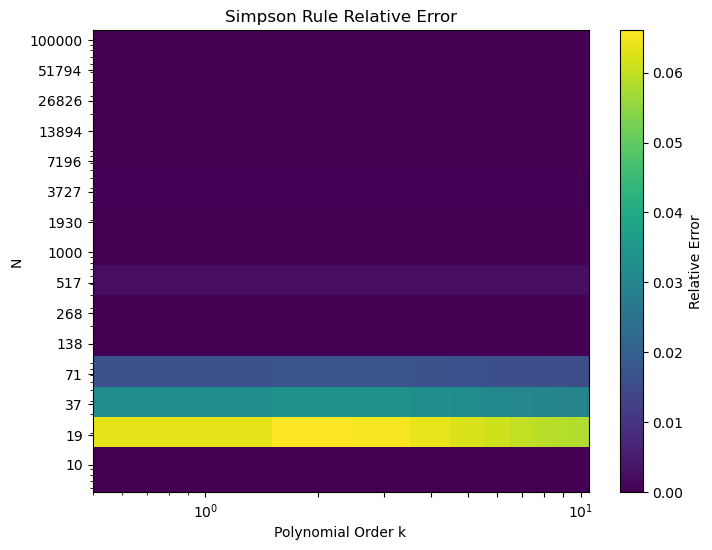

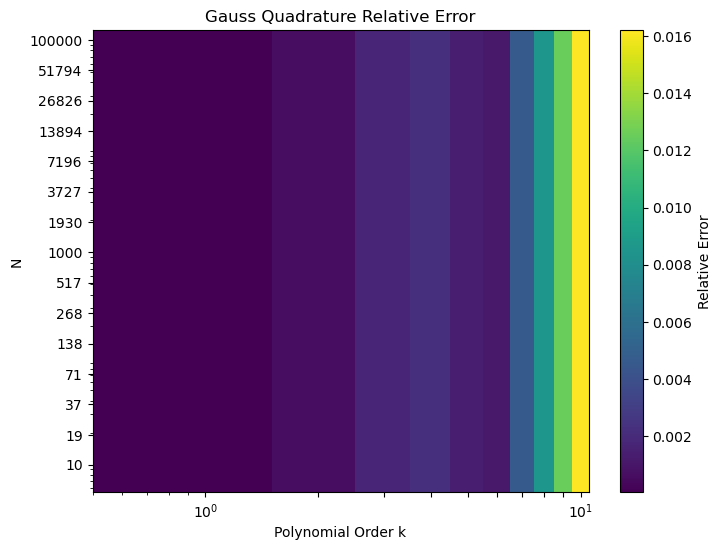

'--------------------Write your code above this line------------------------------'

In [9]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre

# Function for the Fermi-Dirac distribution
def fermi_dirac_integrand(k, x):
    return 1 / (1 + np.exp(-k * x))

# True integral of the Fermi-Dirac distribution
def fermi_dirac_integral(k, a, b):
    return (1 / k) * (np.log(np.exp(k * b) + 1) - np.log(np.exp(k * a) + 1))

# Calculate the relative error
def relative_error(I_true, I_approx):
    return 2 * abs(I_true - I_approx) / (abs(I_true) + abs(I_approx))

# Define the Quad_ class for numerical integration
class Quad_:
    def __init__(self, k, N, a, b):
        self.k = k
        self.N = N
        self.a = a
        self.b = b
        self.h = (b - a) / N

    def midpoint_rule(self):
        total = 0
        for i in range(self.N):
            midpoint = self.a + (i + 0.5) * self.h
            total += fermi_dirac_integrand(self.k, midpoint)
        return total * self.h

    def trapezoidal_rule(self):
        total = (fermi_dirac_integrand(self.k, self.a) + fermi_dirac_integrand(self.k, self.b)) / 2
        for i in range(1, self.N):
            total += fermi_dirac_integrand(self.k, self.a + i * self.h)
        return total * self.h

    def simpson_rule(self):
        total = fermi_dirac_integrand(self.k, self.a) + fermi_dirac_integrand(self.k, self.b)
        for i in range(1, self.N, 2):
            total += 4 * fermi_dirac_integrand(self.k, self.a + i * self.h)
        for i in range(2, self.N - 1, 2):
            total += 2 * fermi_dirac_integrand(self.k, self.a + i * self.h)
        return total * self.h / 3

# Define the range for k and N
ks = np.arange(1, 11)
Ns = np.geomspace(10, 1e5, num=15).astype(int)

# Initialize arrays to hold the relative errors
relative_errors_mid = np.zeros((len(Ns), len(ks)))
relative_errors_trap = np.zeros((len(Ns), len(ks)))
relative_errors_simp = np.zeros((len(Ns), len(ks)))
relative_errors_gauss = np.zeros((len(Ns), len(ks)))

# Calculate the quadratures and relative errors
for i, k in enumerate(ks):
    for j, N in enumerate(Ns):
        quad = Quad_(k, N, 0, 1)
        I_true = fermi_dirac_integral(k, 0, 1)
        
        # Midpoint Rule
        M = quad.midpoint_rule()
        relative_errors_mid[j, i] = relative_error(I_true, M)
        
        # Trapezoidal Rule
        T = quad.trapezoidal_rule()
        relative_errors_trap[j, i] = relative_error(I_true, T)
        
        # Simpson Rule
        S = quad.simpson_rule()
        relative_errors_simp[j, i] = relative_error(I_true, S)
        
        # Gauss Quadrature Rule
        roots, weights = roots_legendre(2)  # Order 2 for Gauss-Legendre Quadrature
        transformed_roots = 0.5 * (1 + roots)  # Rescale roots to [0, 1]
        G = np.sum(weights * fermi_dirac_integrand(k, transformed_roots)) / 2
        relative_errors_gauss[j, i] = relative_error(I_true, G)

# Plotting function
def plot_heatmap(data, title, ks, Ns):
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(ks, Ns, data, shading='nearest', cmap='viridis')
    plt.colorbar(label='Relative Error')
    plt.title(title)
    plt.xlabel('Polynomial Order k')
    plt.ylabel('N')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(ks)
    plt.yticks(Ns, labels=[str(n) for n in Ns])
    plt.show()

# Now, plot the heatmaps for each quadrature method
plot_heatmap(relative_errors_mid, 'Midpoint Rule Relative Error', ks, Ns)
plot_heatmap(relative_errors_trap, 'Trapezoidal Rule Relative Error', ks, Ns)
plot_heatmap(relative_errors_simp, 'Simpson Rule Relative Error', ks, Ns)
plot_heatmap(relative_errors_gauss, 'Gauss Quadrature Relative Error', ks, Ns)



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Harmonic Oscillator </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 1. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total energy of a harmonic oscillator is given by <br>
$$ E = \frac{1}{2}m \left(\frac{dx}{dt}\right)^2 + V(x) $$
Assuming that the potential $V(x)$ is symmetric about $x=0$ and the amplitude of the oscillator is $a$. Then the equation for the time period is given by <br>
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a) - V(x)}} $$


## A)
Suppose the potential is $V(x) = x^4$ and mass of the particle $m=1$, write a function that calculates the period for a given amplitude.

In [11]:
from scipy.integrate import quad
def V(x):
    return x**4

def integrand(x, a):
    return 1 / np.sqrt(V(a) - V(x))

def timep(amplitude):
    m = 1
    integral, _ = quad(integrand, 0, amplitude, args=(amplitude,))
    T = np.sqrt(8 * m) * integral
    return T

amplitude = 1
period = timep(amplitude)
print(f"Amplitude: {amplitude}; Period: {period}")

Amplitude: 1; Period: 3.708149354603402


## B) 
Let $a = 2$. Use inbuilt 'fixed_quad' (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.fixed_quad.html) function to calculate the time period for different values of 'N' (number of integration points). Calculate the error in the integral by estimating the difference for 'N' & '2N'. Approximately, at what 'N' is the absolute error less than $10^{-4}$ for 'a = 2'?

In [12]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import fixed_quad
import numpy as np

def V(x):
    return x**4

def integrand(x, a):
    return 1 / np.sqrt(V(a) - V(x))

def time_period_fixed_quad(amplitude, N):
    m = 1 
    integral, _ = fixed_quad(integrand, 0, amplitude, args=(amplitude,), n=N)
    T = np.sqrt(8 * m) * integral
    return T

# Amplitude = 2
amplitude = 2

N = 1
error = np.inf  

while error > 1e-4:
    T_N = time_period_fixed_quad(amplitude, N)
    T_2N = time_period_fixed_quad(amplitude, 2*N)
    error = np.abs(T_N - T_2N)
    print(f"N: {N}, Period: {T_N}, Error between N and 2N: {error}")
    N *= 2  
print(f"Approximately, at {N//2}, the absolute error less than $10^{-4}$ for 'a = 2'")


'''--------------------Write your code above this line------------------------------'''

N: 1, Period: 1.4605934866804429, Error between N and 2N: 0.15028112968140372
N: 2, Period: 1.6108746163618466, Error between N and 2N: 0.10686891159115475
N: 4, Period: 1.7177435279530013, Error between N and 2N: 0.0639707774321574
N: 8, Period: 1.7817143053851587, Error between N and 2N: 0.0350567498506027
N: 16, Period: 1.8167710552357614, Error between N and 2N: 0.018361179742043765
N: 32, Period: 1.8351322349778052, Error between N and 2N: 0.009397320528150566
N: 64, Period: 1.8445295555059558, Error between N and 2N: 0.004753929257606648
N: 128, Period: 1.8492834847635624, Error between N and 2N: 0.002390918736097536
N: 256, Period: 1.85167440349966, Error between N and 2N: 0.0011989650549499853
N: 512, Period: 1.85287336855461, Error between N and 2N: 0.0006003611044518298
N: 1024, Period: 1.8534737296590618, Error between N and 2N: 0.0003004003154996049
N: 2048, Period: 1.8537741299745614, Error between N and 2N: 0.00015025544730740137
N: 4096, Period: 1.8539243854218688, Error

'--------------------Write your code above this line------------------------------'

## C) 
Use inbuilt 'quad' (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) function that returns an error estimate and compare your answer for 'a = 2' (quad uses a more advanced integration technique)

In [13]:


'''--------------------Write your code below this line------------------------------'''
from scipy.integrate import quad
import numpy as np

def V(x):
    return x**4

def integrand(x, a):
    return 1 / np.sqrt(V(a) - V(x))

def calculate_period_quad(amplitude):
    m = 1
    # integral
    integral, integral_error = quad(integrand, 0, amplitude, args=(amplitude,))
    # period
    T = np.sqrt(8 * m) * integral
    return T, integral_error

# Amplitude = 2
amplitude = 2

period_quad, error_quad = calculate_period_quad(amplitude)

print(f"amplitude : {amplitude} ; period : {period_quad}")
print(f"estimate error for the integral is: {error_quad}")


'''--------------------Write your code above this line------------------------------'''

amplitude : 2 ; period : 1.854074677301701
estimate error for the integral is: 7.095168896853465e-11


'--------------------Write your code above this line------------------------------'

 ## D) 
Calculate the time period by using the inbuilt romberg function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html) for Romberg integration. 
A simplistic usage with romberg(func, 0, a), where a is the amplitude, will probably give error or 'nan'. Why? 

In [14]:


'''--------------------Write your code below this line------------------------------'''
def V(x):
    return x**4

def integrand(x, a):
    return 1 / np.sqrt(V(a) - V(x))

amplitude = 2 
try:
    period_romberg = romberg(integrand, 0, amplitude, args=(amplitude,))
    print(f"amplitude:  {amplitude} ; period : {period_romberg}")
except Exception as e:
    print(f"error:{e}")

#this is an imporper integral, so the ourput is nan


'''--------------------Write your code above this line------------------------------'''

amplitude:  2 ; period : nan


/var/folders/4m/2mkd74y11fvfvt11nd6zmr1m0000gn/T/ipykernel_33507/2941389513.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / np.sqrt(V(a) - V(x))
/Users/annabellayang/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:724: RuntimeWarning: invalid value encountered in double_scalars
  return (tmp * c - b)/(tmp - 1.0)
/Users/annabellayang/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## E) 
Assume that we can tolerate the uncertainitiy of $10^{-5}$ in the position. Show and output of 'keyword' show = True for 'a = 2'. Use this to estimate error for divmax = 10.


In [15]:


'''--------------------Write your code below this line------------------------------'''
def V(x):
    return x**4


def integrand(x, a):
    if x == a:
        return 0
    else:
        return 1 / np.sqrt(V(a) - V(x))

def calculate_period_romberg(amplitude, divmax, tol):
    m = 1 
    integral = romberg(integrand, 0, amplitude, args=(amplitude,), divmax=divmax, tol=tol, show=True)
    T = np.sqrt(8 * m) * integral
    return T

amplitude = 2
tolerance = 1e-5
divmax = 10

integral_divmax = calculate_period_romberg(amplitude, divmax, tolerance)
integral_divmax2 = calculate_period_romberg(amplitude, divmax*2, tolerance)

estimated_error = np.abs(integral_divmax - integral_divmax2)
print(f"final error for {divmax} is {estimated_error}")

# the final error for divmax is 10: 0.025973371042280924

'''--------------------Write your code above this line------------------------------'''

/Users/annabellayang/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.926967e-03
  warnings.warn(


Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fc3d80f9940> from [0, 2]

 Steps  StepSize   Results
     1  2.000000  0.250000 
     2  1.000000  0.383199  0.427599 
     4  0.500000  0.468030  0.496307  0.500888 
     8  0.250000  0.524701  0.543592  0.546744  0.547472 
    16  0.125000  0.563631  0.576608  0.578809  0.579318  0.579443 
    32  0.062500  0.590760  0.599802  0.601349  0.601706  0.601794  0.601816 
    64  0.031250  0.609802  0.616150  0.617239  0.617492  0.617554  0.617569  0.617573 
   128  0.015625  0.623218  0.627690  0.628459  0.628637  0.628681  0.628692  0.628695  0.628695 
   256  0.007812  0.632687  0.635843  0.636387  0.636513  0.636543  0.636551  0.636553  0.636554  0.636554 
   512  0.003906  0.639376  0.641606  0.641990  0.642079  0.642101  0.642106  0.642108  0.642108  0.642108  0.642108 
  1024  0.001953  0.644104  0.645680  0.645952  0.646015  0.646030  0.646034  0.646035  0.646035  0.646035  0.646035  0.646035 

The final result is 0.6

/Users/annabellayang/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (20) exceeded. Latest difference = 1.226952e-04
  warnings.warn(


'--------------------Write your code above this line------------------------------'

## F)
 Change divmax to change the number of divisions. How does the accuracy change on going from 10 to 15 divisions.

In [16]:


'''--------------------Write your code below this line------------------------------'''
def V(x):
    return x**4


def integrand(x, a):
    if x == a:
        return 0
    else:
        return 1 / np.sqrt(V(a) - V(x))

def calculate_period_romberg(amplitude, divmax, tol):
    m = 1 
    integral = romberg(integrand, 0, amplitude, args=(amplitude,), divmax=divmax, tol=tol, show=True)
    T = np.sqrt(8 * m) * integral
    return T

amplitude = 2
tolerance = 1e-5
divmax = 15

integral_divmax = calculate_period_romberg(amplitude, divmax, tolerance)
integral_divmax2 = calculate_period_romberg(amplitude, divmax*2, tolerance)

estimated_error = np.abs(integral_divmax - integral_divmax2)
print(f"final error for {divmax} is {estimated_error}")

# the final error for divmax is 15: 0.025973371042280924

'''--------------------Write your code above this line------------------------------'''

/Users/annabellayang/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:855: AccuracyWarning: divmax (15) exceeded. Latest difference = 6.940724e-04
  warnings.warn(


Romberg integration of <function vectorize1.<locals>.vfunc at 0x7fc428348ca0> from [0, 2]

 Steps  StepSize   Results
     1  2.000000  0.250000 
     2  1.000000  0.383199  0.427599 
     4  0.500000  0.468030  0.496307  0.500888 
     8  0.250000  0.524701  0.543592  0.546744  0.547472 
    16  0.125000  0.563631  0.576608  0.578809  0.579318  0.579443 
    32  0.062500  0.590760  0.599802  0.601349  0.601706  0.601794  0.601816 
    64  0.031250  0.609802  0.616150  0.617239  0.617492  0.617554  0.617569  0.617573 
   128  0.015625  0.623218  0.627690  0.628459  0.628637  0.628681  0.628692  0.628695  0.628695 
   256  0.007812  0.632687  0.635843  0.636387  0.636513  0.636543  0.636551  0.636553  0.636554  0.636554 
   512  0.003906  0.639376  0.641606  0.641990  0.642079  0.642101  0.642106  0.642108  0.642108  0.642108  0.642108 
  1024  0.001953  0.644104  0.645680  0.645952  0.646015  0.646030  0.646034  0.646035  0.646035  0.646035  0.646035  0.646035 
  2048  0.000977  0.6474

'--------------------Write your code above this line------------------------------'

## G) 
Use the function to make a graph of the period for amplitude ranging from a=0 to a=2.

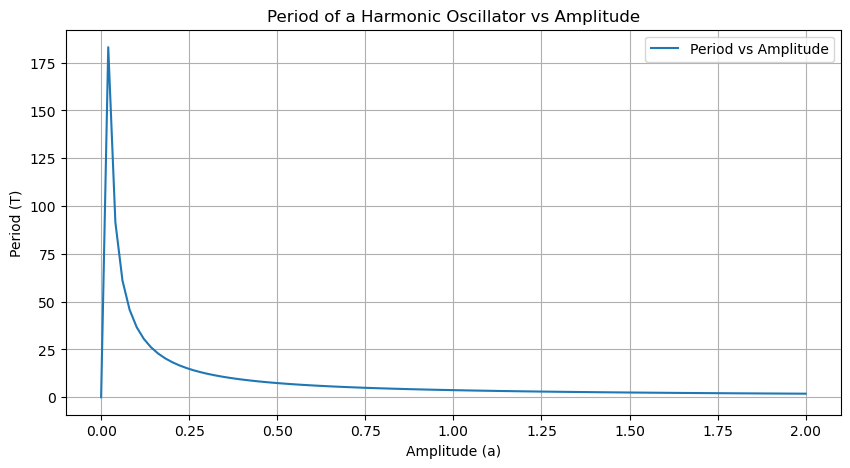

'--------------------Write your code above this line------------------------------'

In [17]:


'''--------------------Write your code below this line------------------------------'''
import warnings
def V(x):
    return x**4

def integrand(x, a):
    if x == a:
        return 0
    else:
        return 1 / np.sqrt(V(a) - V(x))

def calculate_period_romberg(amplitude, divmax, tol):
    m = 1 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Ignore integration warnings
        integral = romberg(integrand, 0, amplitude, args=(amplitude,), divmax=divmax, tol=tol, show=False)
    T = np.sqrt(8 * m) * integral
    return T

amplitudes = np.linspace(0, 2, 100)
periods = []

for a in amplitudes:
    if a == 0:
        periods.append(0)
    else:
        period = calculate_period_romberg(a, divmax=15, tol=1e-5)
        periods.append(period)


plt.figure(figsize=(10, 5))
plt.plot(amplitudes, periods, label='Period vs Amplitude')
plt.title('Period of a Harmonic Oscillator vs Amplitude')
plt.xlabel('Amplitude (a)')
plt.ylabel('Period (T)')
plt.legend()
plt.grid(True)
plt.show()

'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Black Body Radiation </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 2. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


The total rate at which energy is radiated by a black body per unit area over all frequencies is 

$$ W = \frac{2 \pi k_B^4T^4}{c^2 {h}^3} \int _0^\infty \frac{x^3}{e^x -1} dx $$


## A) 
Write a function to to evaluate the integral in this expression. You will need to change the variables to go from an infinite range to a finite range. What is the change of variable and new functional form? The variable to go from range 0 to $\infty$ to a finite range of is 

$$ z = \frac{x}{1+x} $$
or equivalently
$$ x = \frac{z}{1-z} $$


In [20]:
#Constants
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
coefficient = k**4/c**2/hb**3/4/pi**2 
#True value
stfconst = 5.670367e-8

def blackbody_var(z):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        'Blackbody spectrum after change of variables'
        x = z / (1 - z)
        dx_dz = 1 / (1 - z)**2
        return (x**3 * dx_dz) / (np.exp(x) - 1)
integral_result, _ = quad(blackbody_var, 0, 1)
W = coefficient * integral_result
print(f"integral result: {integral_result}")
print(f"W: {W}")

integral result: 6.493939402266829
W: 5.662703503454043e-08


## B) 
According to Stefan's law, the total energy given off by a black-body per unit area per second is given by 
$$ W = \sigma T^4 $$. Use the integral to calculate the value of Stefan Boltzmann constant $\sigma$. Use 'fixed_quad' function to do the integral.   


In [23]:


'''--------------------Write your code below this line------------------------------'''
k = 1.38064852e-23 
h = 6.626e-34
pi= np.pi
c = 3e8
hb = h /2/pi
prefactor = k**4/c**2/hb**3/4/pi**2 

def blackbody_var_stable(z):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = np.where(z < 1, z / (1 - z), 0)
        dx_dz = np.where(z < 1, 1 / (1 - z)**2, 0)
        exp_x = np.exp(x)
        return np.where(exp_x < 1e10, (x**3 * dx_dz) / (exp_x - 1), 0)

integral_result, _ = fixed_quad(blackbody_var_stable, 0, 1, n=200)

# Calculate the Stefan-Boltzmann constant using the integral result
sigma = 2 * np.pi**5 * k**4 / (15 * h**3 * c**2) * integral_result

# Output the calculated value of the Stefan-Boltzmann constant
print(f"fixed_quad method Stefan-Boltzmann constant: {sigma:.3e} W/m²K⁴")

'''--------------------Write your code above this line------------------------------'''

fixed_quard method Stefan-Boltzmann constant: 3.677e-07 W/m²K⁴


'--------------------Write your code above this line------------------------------'

## C) 
Inbuilt 'quad' function can support an infinite range for integration. Write another function to do the integration from 0 to $\infty$ and compare your answer.

In [25]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import scipy.integrate as integrate
import warnings

k = 1.38064852e-23
h = 6.626e-34
pi = np.pi
c = 3e8
hb = h / (2 * pi)

def blackbody_var_infinite(x):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        exp_x = np.exp(x)
        return x**3 / (exp_x - 1)

integral_result_infinite, _ = integrate.quad(blackbody_var_infinite, 0, np.inf)

sigma_infinite = 2 * pi**5 * k**4 / (15 * h**3 * c**2) * integral_result_infinite

print(f"bulidin quad method Stefan-Boltzmann constant: {sigma_infinite:.3e} W/m²K⁴")
print(f"comparing to...")
print(f"fixed_quad method Stefan-Boltzmann constant: {sigma:.3e} W/m²K⁴")


'''--------------------Write your code above this line------------------------------'''

bulidin quad method Stefan-Boltzmann constant: 3.677e-07 W/m²K⁴
comparing to...
fixed_quad method Stefan-Boltzmann constant: 3.677e-07 W/m²K⁴


'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h2><strong> Planetary Orbit Integration </strong></h2>
</div>

This question is adapted from Prof.Uros Seljak (Berkeley) problem set 1 question 4. For more information, please visit https://phy151-ucb.github.io/seljak-phy151-fall-2018/#course-syllabus


One of the great achievements in the history of science was the discovery of the laws of J. Kepler, based on many precise measurements of the positions of Mars by Tycho Brahe and himself. The planets move in elliptic orbits with the sun at one of the foci (Kepler’s first law).

Newton (Principia 1687) then explained this motion by his general law of gravitational attraction (proportional to $1/r^2$) and the relation between forces and acceleration. This then opened the way for treating arbitrary celestial motions by solving differential equations.


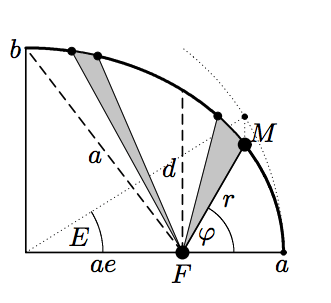


Consider the following two-body problem, wherein a single planet orbits around a large star. Stellar mass is much larger than planetary mass, so we choose the star as the center of our coordinate system. Now, consider the planet's two-dimensional elliptical orbit around the star. The position of the planet is given by the coordinates $q = (q_1, q_2)$, with the planet's velocity given by $p = \dot{q}$.

Newton's laws, with a suitable normalization, yield the following ordinary differential equations:

$$ \ddot{q_1} = -\frac{q_1}{(q_1^2 + q_2^2)^{3/2}},\ \ \ \ddot{q_2} = -\frac{q_2}{(q_1^2 + q_2^2)^{3/2}}. $$

This is equivalent to a Hamiltonian system with the Hamiltonian:
$$ H(p,q) = \frac{1}{2}(p_1^2 + p_2^2) - \frac{1}{\sqrt{q_1^2 + q_2^2}} $$
$$p_i = \dot{q_i}$$

We will consider the initial position and velocity of the planet to be:
$$ q_1(0) = 1-e,\ \ \ q_2(0) = 0,\ \ \ \dot{q_1}(0) = 0,\ \ \ \dot{q_2}(0) = \sqrt{\frac{1+e}{1-e}} $$

Now determine $q$ as a function of time $t$.




## A) 
 Q1. Using 400000 steps, use the explicit Euler method (Let $f(q) = \frac{dq}{dt}$. Then, $q(t+\Delta t) = \Delta t \cdot f(q)$ for small $\Delta t$) and plot the orbit of the planet. Assume $e = 0.6$ and integrate to a final time of $T_f = 200$.
 
 $$ q_{n+1} = q_n + \Delta t \cdot \dot{q_n} $$
$$ \dot{q}_{n+1} = p_{n+1} = p_n + \Delta t \cdot \dot{p_n} $$

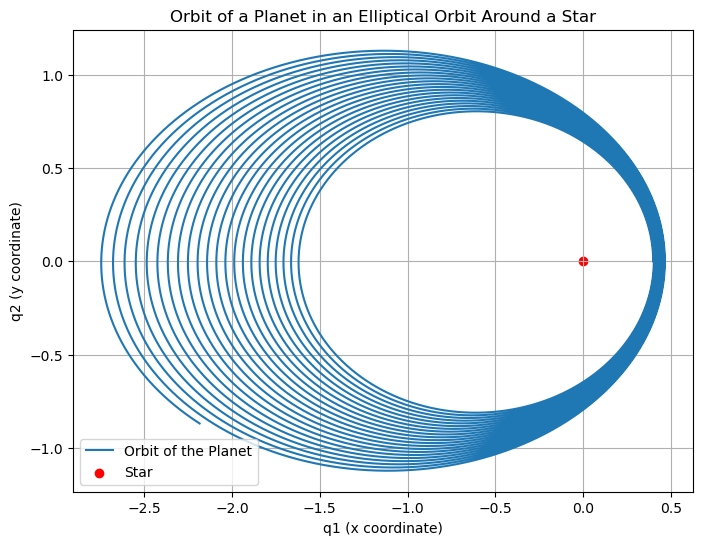

'--------------------Write your code above this line------------------------------'

In [31]:


'''--------------------Write your code below this line------------------------------'''

e = 0.6  # eccentricity
T_f = 200
n_steps = 400000  # steps
dt = T_f / n_steps

q1_0 = 1 - e
q2_0 = 0
p1_0 = 0
p2_0 = np.sqrt((1 + e) / (1 - e))

# initialize
q1, q2, p1, p2 = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)

q1[0], q2[0] = q1_0, q2_0
p1[0], p2[0] = p1_0, p2_0

# Explicit Euler method
for i in range(1, n_steps):
    # new velocities
    p1[i] = p1[i-1] - dt * q1[i-1] / (q1[i-1]**2 + q2[i-1]**2)**(3/2)
    p2[i] = p2[i-1] - dt * q2[i-1] / (q1[i-1]**2 + q2[i-1]**2)**(3/2)

    # new positions
    q1[i] = q1[i-1] + dt * p1[i-1]
    q2[i] = q2[i-1] + dt * p2[i-1]

plt.figure(figsize=(8, 6))
plt.plot(q1, q2, label='Orbit of the Planet')
plt.scatter([0], [0], color='red', label='Star')
plt.xlabel('q1 (x coordinate)')
plt.ylabel('q2 (y coordinate)')
plt.title('Orbit of a Planet in an Elliptical Orbit Around a Star')
plt.legend()
plt.grid(True)
plt.show()


'''--------------------Write your code above this line------------------------------'''

## B) 
Using 400000 steps, use the symplectic Euler method. 

$$ p_{n+1} = p_n - \Delta t H_q(p_{n+1}, q_n) $$
$$ q_{n+1} = q_n + \Delta t H_p(p_{n+1}, q_n) $$
or
$$ q_{n+1} = q_n + \Delta t H_p(p_n, q_{n+1}) $$
$$ p_{n+1} = p_n - \Delta t H_p(p_n, q_{n+1}) $$
where $H_p$ and $H_q$ denote the column vectors of partial derivatives of the Hamiltonian with respect to $p$ and $q$, respectively. i.e. $H_{p_1} = p_1, H_{q_1} = \frac{q_1}{(q_1^2 + q_2^2)^{3/2}}, H_{p_2} = p_2, H_{q_2} = \frac{q_2}{(q_1^2 + q_2^2)^{3/2}}$. 
 
 
Again plot the orbit of the planet. Compare your results in A) and B) by plotting both solutions in the same figure. 

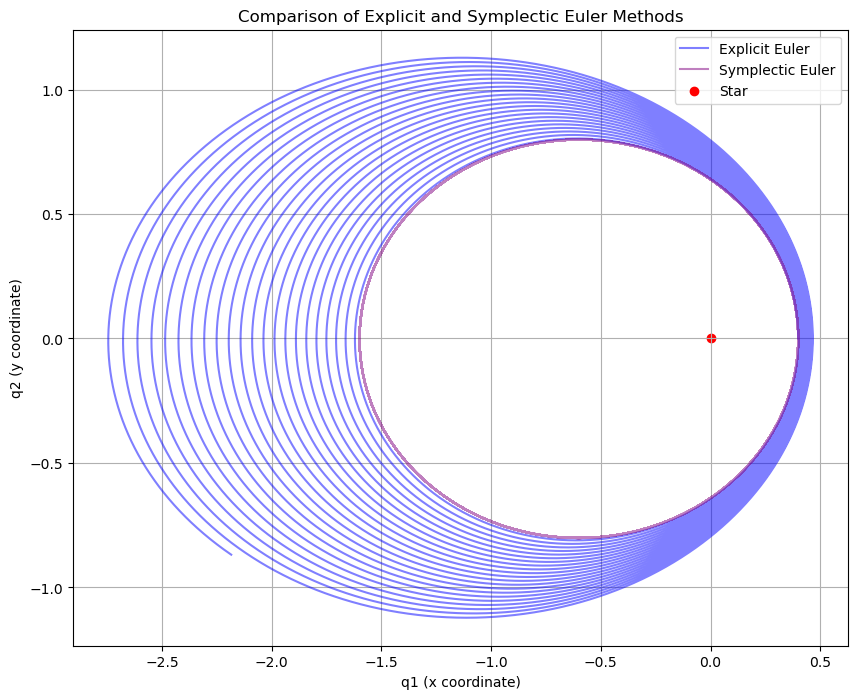

'--------------------Write your code above this line------------------------------'

In [34]:


'''--------------------Write your code below this line------------------------------'''

# Implementation of the symplectic Euler method

# initializing
q1_s, q2_s, p1_s, p2_s = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)

# Set initial values
q1_s[0], q2_s[0] = q1_0, q2_0
p1_s[0], p2_s[0] = p1_0, p2_0

# Symplectic Euler method
for i in range(n_steps - 1):
    # p in term of q
    p1_s[i+1] = p1_s[i] - dt * q1_s[i] / (q1_s[i]**2 + q2_s[i]**2)**(3/2)
    p2_s[i+1] = p2_s[i] - dt * q2_s[i] / (q1_s[i]**2 + q2_s[i]**2)**(3/2)

    # q in term of p
    q1_s[i+1] = q1_s[i] + dt * p1_s[i+1]
    q2_s[i+1] = q2_s[i] + dt * p2_s[i+1]

plt.figure(figsize=(10, 8))

# Explicit Euler
plt.plot(q1, q2, label='Explicit Euler', color='blue', alpha = 0.5)

# Symplectic Euler
plt.plot(q1_s, q2_s, label='Symplectic Euler', color='purple', alpha = 0.5)

plt.scatter([0], [0], color='red', label='Star')

plt.xlabel('q1 (x coordinate)')
plt.ylabel('q2 (y coordinate)')
plt.title('Comparison of Explicit and Symplectic Euler Methods')
plt.legend()
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''